In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Find the most recent date in the data set.
#get column names
columns = inspector.get_columns('measurement')
for column in columns:
    print (column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#get most recent date
recent_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
recent_date

('2017-08-23')

<AxesSubplot:title={'center':'Precipitation Analysis'}, xlabel='date'>

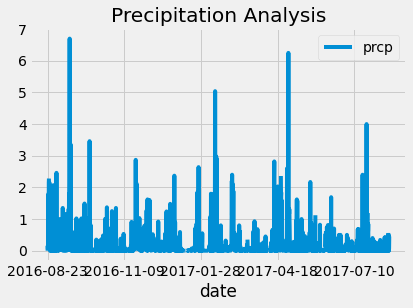

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(func.count(Measurement.date)).all()
# Calculate the date one year from the last date in data set.
year_earlier = session.query(func.max(Measurement.date)).all()
year_earlier

# Perform a query to retrieve the data and precipitation scores
prcp_data = (session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >='2016-08-23').\
            order_by(Measurement.date).all())
prcp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data)
prcp_df = prcp_df.set_index('date')

# Sort the dataframe by date
prcp_df = prcp_df.sort_index(ascending=True)
prcp_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title = 'Precipitation Analysis')

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).count()
station_count

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
most_active_stations        

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_ID = most_active_stations[0][0]
most_active_ID

highest_temp = session.query(func.max(Measurement.tobs)).\
                filter(Measurement.station == most_active_ID).all()
highest_temp

lowest_temp = session.query(func.min(Measurement.tobs)).\
                filter(Measurement.station == most_active_ID).all()
lowest_temp

average_temp = session.query(func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active_ID).all()
average_temp
print(f'The highest temperature is {highest_temp[0][0]}')
print(f'The lowest temperature is {lowest_temp[0][0]}')
print(f'The average temperature is {average_temp[0][0]}')

The highest temperature is 85.0
The lowest temperature is 54.0
The average temperature is 71.66378066378067


<AxesSubplot:ylabel='Frequency'>

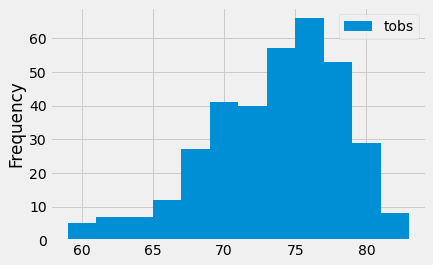

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_year = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date >='2016-08-23').\
            filter(Measurement.station == most_active_ID).\
            order_by(Measurement.date).all()

temp_df = pd.DataFrame(temp_year)
temp_df = temp_df.set_index('date')
temp_df = temp_df.sort_index(ascending=True)
temp_df.head()

temp_df.plot(kind='hist', bins=12)

# Close session

In [ ]:
# Close Session
session.close()